In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('shopping_behavior_updated.csv')

# Display first five rows
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

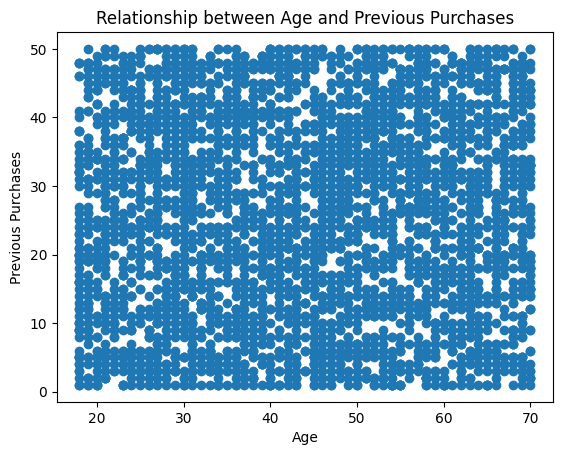

In [9]:
plt.scatter(df['Age'], df['Previous Purchases'])
plt.title('Relationship between Age and Previous Purchases')
plt.xlabel('Age')
plt.ylabel('Previous Purchases')
plt.show()

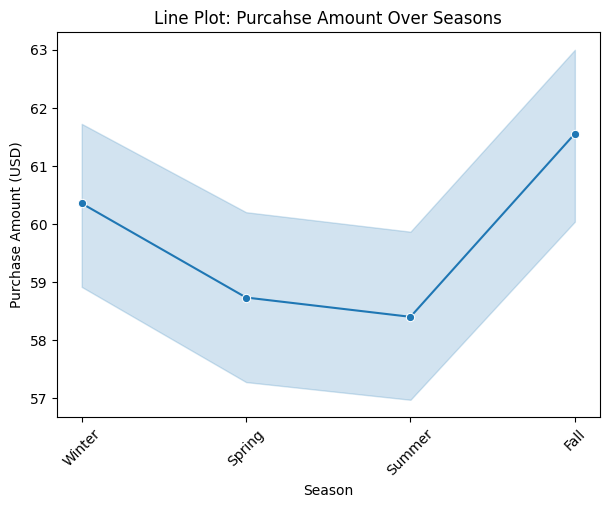

In [13]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Season', y='Purchase Amount (USD)', marker='o')
plt.title('Line Plot: Purcahse Amount Over Seasons')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

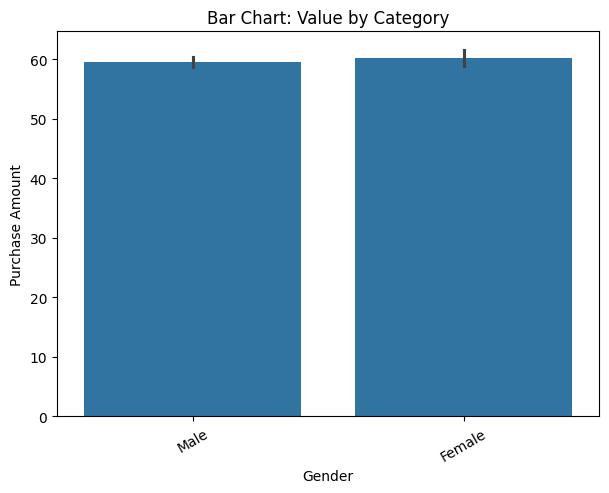

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='Gender', y='Purchase Amount (USD)')
plt.title('Bar Chart: Value by Category')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=30)
plt.show()

In [16]:
df.isnull().sum()
df['Gender'].fillna(df['Age'].mean(), inplace=True)

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [19]:
Q1 = df['Previous Purchases'].quantile(0.25)
Q3 = df['Previous Purchases'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Previous Purchases'] < lower) | (df['Previous Purchases'] > upper)]
print("Outliers count:", len(outliers))

# Remove outliers
df = df[(df['Previous Purchases'] >= lower) & (df['Previous Purchases'] <= upper)]


Outliers count: 0


In [20]:
df_sample = df.sample(frac=0.5, random_state=42)

# Drop irrelevant columns
df_reduced = df_sample.drop(['Customer ID', 'Subscription Status'], axis=1)
df_reduced.head()


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
839,48,Male,Shirt,Clothing,31,Illinois,L,Teal,Spring,2.6,Free Shipping,Yes,Yes,10,Debit Card,Every 3 Months
1717,29,Male,Hoodie,Clothing,50,Hawaii,L,Orange,Summer,2.9,Express,No,No,16,Debit Card,Bi-Weekly
321,41,Male,Sneakers,Footwear,36,Vermont,L,Orange,Summer,4.7,Free Shipping,Yes,Yes,48,Debit Card,Quarterly
3187,67,Female,Blouse,Clothing,72,Texas,L,Indigo,Winter,3.2,Free Shipping,No,No,28,Debit Card,Weekly
2269,49,Male,Skirt,Clothing,38,Kentucky,M,Yellow,Fall,4.4,Store Pickup,No,No,27,Credit Card,Annually


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_reduced[['Review Rating']] = scaler.fit_transform(df_reduced[['Review Rating']])

df_reduced['Review Rating'] = pd.cut(df_reduced['Review Rating'],bins=3,labels=['Low','Medium','High'])
df_reduced.head()


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
839,48,Male,Shirt,Clothing,31,Illinois,L,Teal,Spring,Low,Free Shipping,Yes,Yes,10,Debit Card,Every 3 Months
1717,29,Male,Hoodie,Clothing,50,Hawaii,L,Orange,Summer,Low,Express,No,No,16,Debit Card,Bi-Weekly
321,41,Male,Sneakers,Footwear,36,Vermont,L,Orange,Summer,High,Free Shipping,Yes,Yes,48,Debit Card,Quarterly
3187,67,Female,Blouse,Clothing,72,Texas,L,Indigo,Winter,Low,Free Shipping,No,No,28,Debit Card,Weekly
2269,49,Male,Skirt,Clothing,38,Kentucky,M,Yellow,Fall,High,Store Pickup,No,No,27,Credit Card,Annually


In [22]:
df_reduced.info()
df_reduced.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries, 839 to 1260
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     1950 non-null   int64   
 1   Gender                  1950 non-null   object  
 2   Item Purchased          1950 non-null   object  
 3   Category                1950 non-null   object  
 4   Purchase Amount (USD)   1950 non-null   int64   
 5   Location                1950 non-null   object  
 6   Size                    1950 non-null   object  
 7   Color                   1950 non-null   object  
 8   Season                  1950 non-null   object  
 9   Review Rating           1950 non-null   category
 10  Shipping Type           1950 non-null   object  
 11  Discount Applied        1950 non-null   object  
 12  Promo Code Used         1950 non-null   object  
 13  Previous Purchases      1950 non-null   int64   
 14  Payment Method          195

,Age,Purchase Amount (USD),Previous Purchases
count,1950.000000,1950.000000,1950.000000
mean,44.090769,59.461538,25.448205
std,15.349109,23.867371,14.357351
min,18.000000,20.000000,1.000000
25%,31.000000,38.000000,13.000000
50%,44.000000,59.000000,25.000000
75%,57.000000,81.000000,38.000000
max,70.000000,100.000000,50.000000


In [23]:
mean_val = df_reduced['Age'].mean()
median_val = df_reduced['Age'].median()
mode_val = df_reduced['Age'].mode()[0]
min_val = df_reduced['Age'].min()
max_val = df_reduced['Age'].max()

mean_val, median_val, mode_val, min_val, max_val


(44.09076923076923, 44.0, 57, 18, 70)

In [24]:
range_val = max_val - min_val
variance = df_reduced['Age'].var()
std_dev = df_reduced['Age'].std()
Q1 = df_reduced['Age'].quantile(0.25)
Q3 = df_reduced['Age'].quantile(0.75)
IQR = Q3 - Q1

range_val, variance, std_dev, IQR

(52, 235.59514307139753, 15.349108868966873, 26.0)

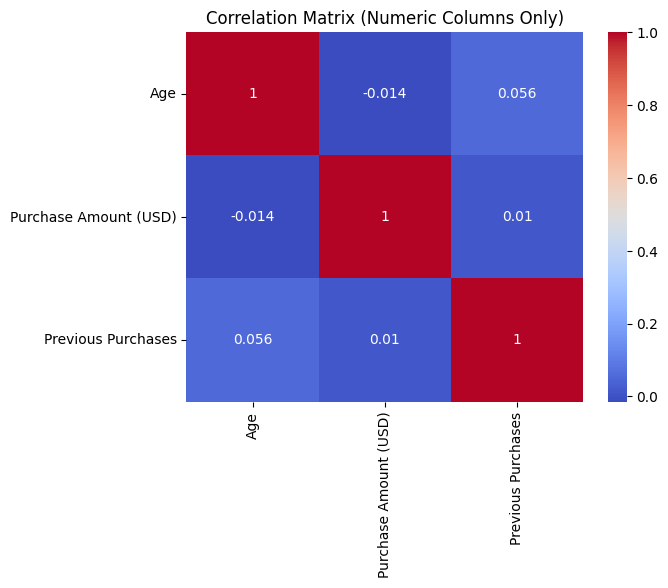

In [26]:
corr = df_reduced.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()
